# Clustering

## Read data from ‘Personal cost medical.csv’

In [1]:
#import library that need to use 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')

### Basic Exploration & Data Cleaning & Feature Engineering

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#use for identification data type
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
#Finding missing values for each feature
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
num_data = df.select_dtypes(include='number')
num_data.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


#### Exploratory Data Analysis

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

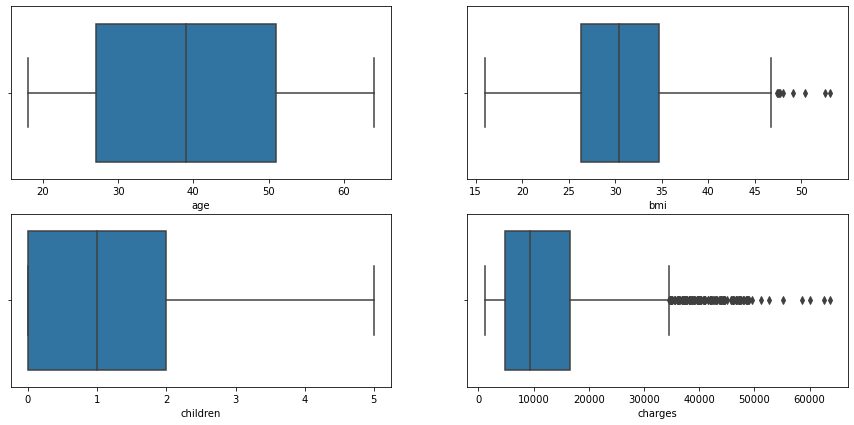

In [7]:
# Create count plots for all nominal features
fig, ax = plt.subplots(2, 2, figsize=(15, 7))
for i, subplot in zip(num_data.columns, ax.flatten()):
    sns.boxplot(num_data[i], ax=subplot)

C:\anaconda\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Distribution of charges by age and smoker')

<Figure size 864x720 with 0 Axes>

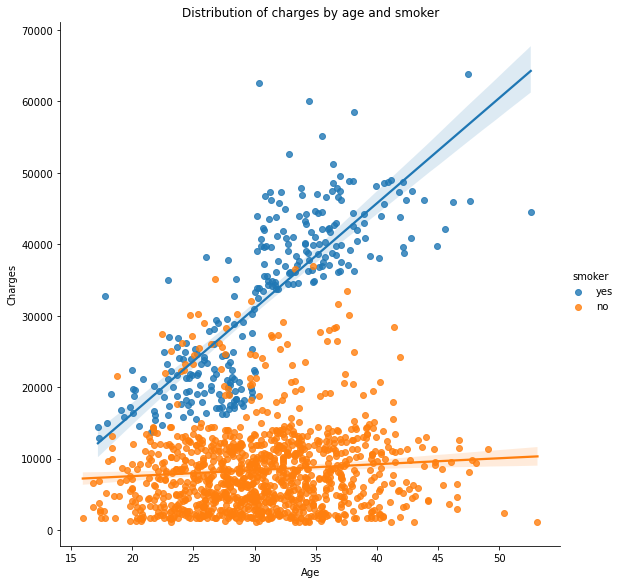

In [8]:
#The relationship between insurance claim amounts and age.
plt.figure(figsize = (12, 10))
sns.lmplot(x="bmi", y="charges", hue='smoker', data=df, size=8)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of charges by age and smoker")

Text(0.5, 1.0, 'Distribution of charges by bmi and sex')

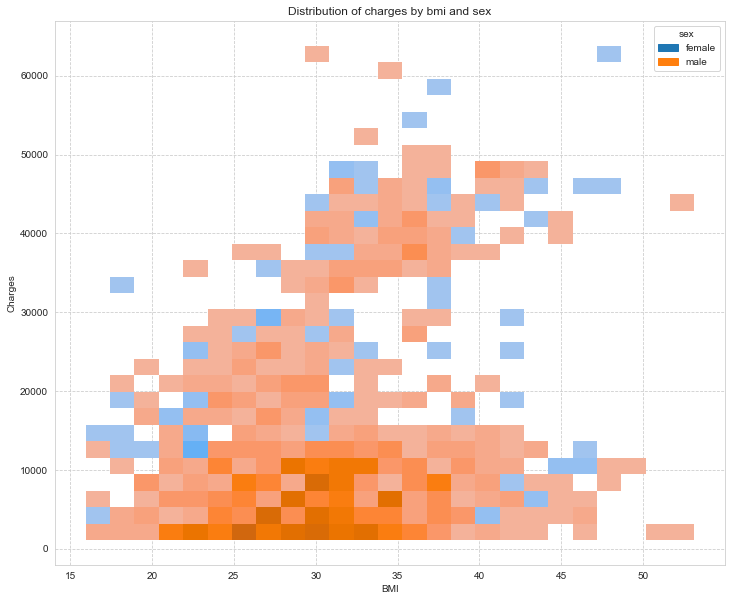

In [9]:
#The relationship between BMI and insurance claims.
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (12, 10))
sns.histplot(x = "bmi", y = "charges", hue="sex", data = df)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Distribution of charges by bmi and sex")

Text(0.5, 1.0, 'Distribution of Charges by Age and Region')

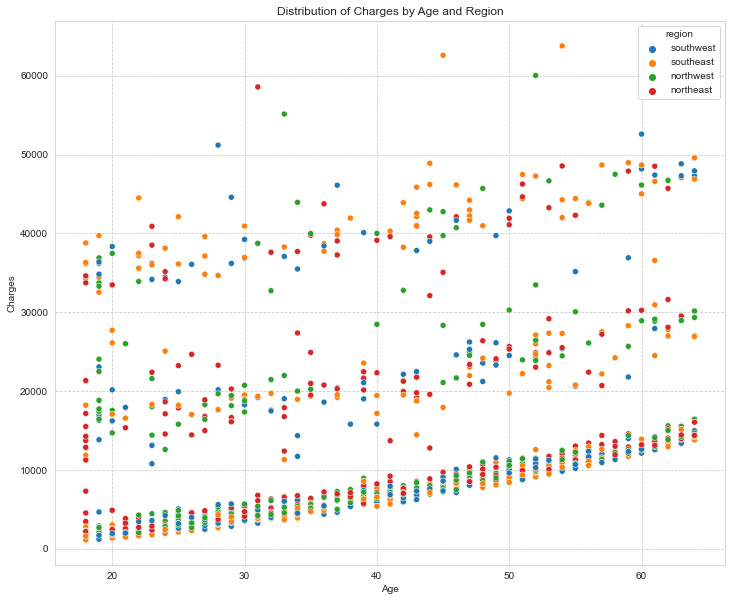

In [10]:
#The relationship between insurance claim amounts and age.
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (12, 10))
sns.scatterplot(x = "age", y = "charges", hue="region",data = df)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of Charges by Age and Region")

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

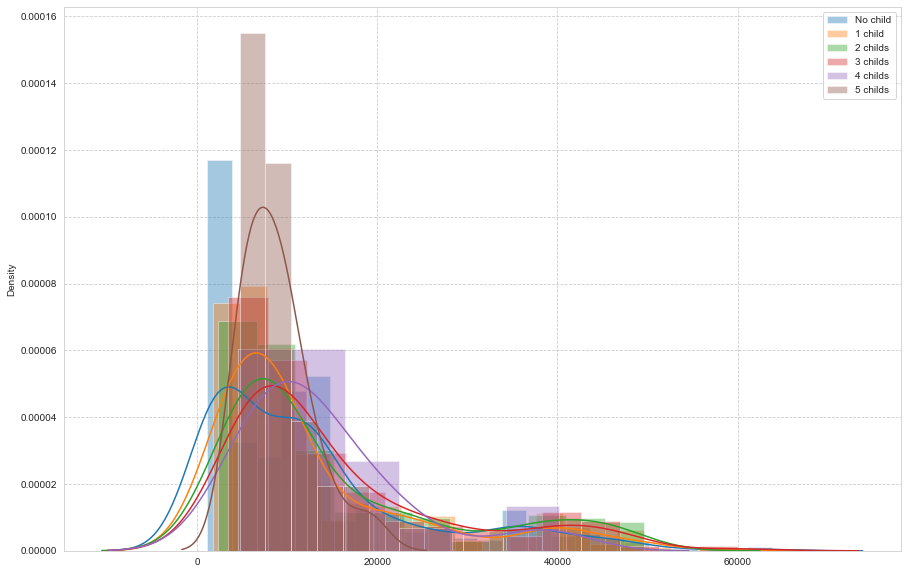

In [11]:
#Charges by number of children
fig, ax = plt.subplots(figsize = (15, 10))
sns.distplot(x=df.loc[df['children']==0, 'charges'], label='No child', ax=ax)
sns.distplot(x=df.loc[df['children']==1, 'charges'], label='1 child', ax=ax)
sns.distplot(x=df.loc[df['children']==2, 'charges'], label='2 childs', ax=ax)
sns.distplot(x=df.loc[df['children']==3, 'charges'], label='3 childs', ax=ax)
sns.distplot(x=df.loc[df['children']==4, 'charges'], label='4 childs', ax=ax)
sns.distplot(x=df.loc[df['children']==5, 'charges'], label='5 childs', ax=ax)
plt.legend()
plt.show()

In [12]:
# fill outlier numeric in bmi feature with mean
num_data[['bmi']] = num_data.bmi.fillna(num_data.mean())

#fill outlier numeric in charges feature with median
num_data[['charges']] = num_data.charges.fillna(num_data.median())
num_data.head(100)

ValueError: Columns must be same length as key

In [13]:
#get class data
cat_data = df.select_dtypes(include='object')
cat_data.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [14]:
#boxplot for each feature
def boxplot(col_name):
    axes = plt.subplots(nrows=1, ncols=1, figsize = (15, 7))
    sns.countplot(ax = axes[1], x = col_name , data = df, palette = 'magma')
    axes[1].set_title((col_name + ' count'), fontsize = 16)
    plt.subplots_adjust(hspace = 0.5)

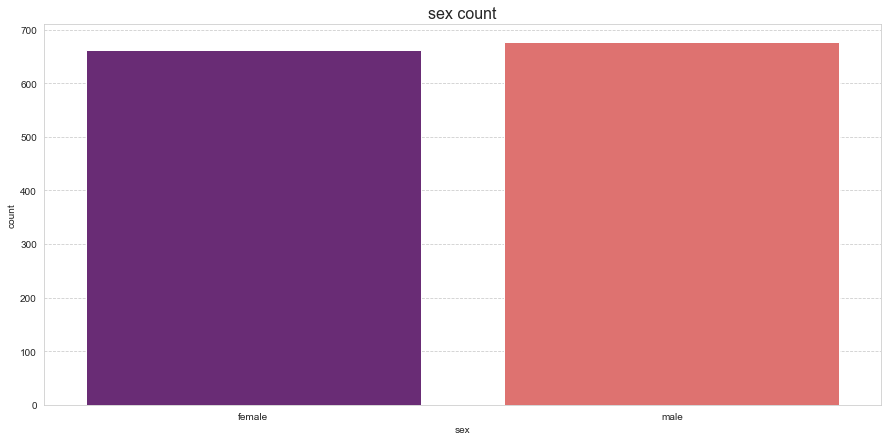

In [15]:
boxplot('sex')

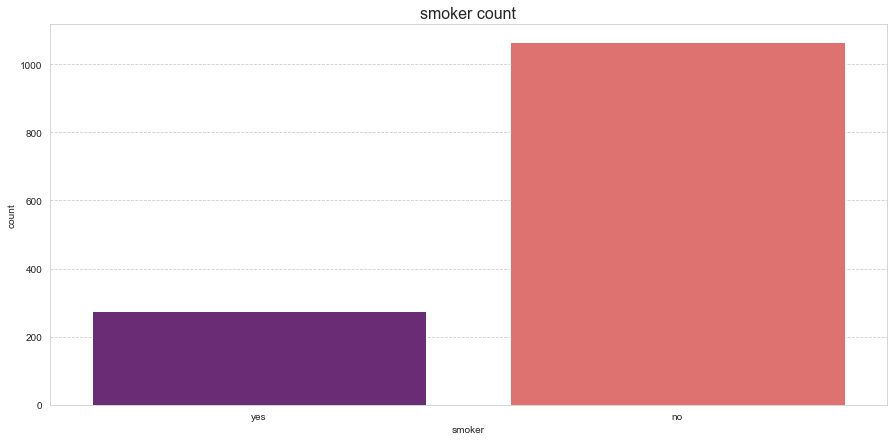

In [16]:
boxplot('smoker')

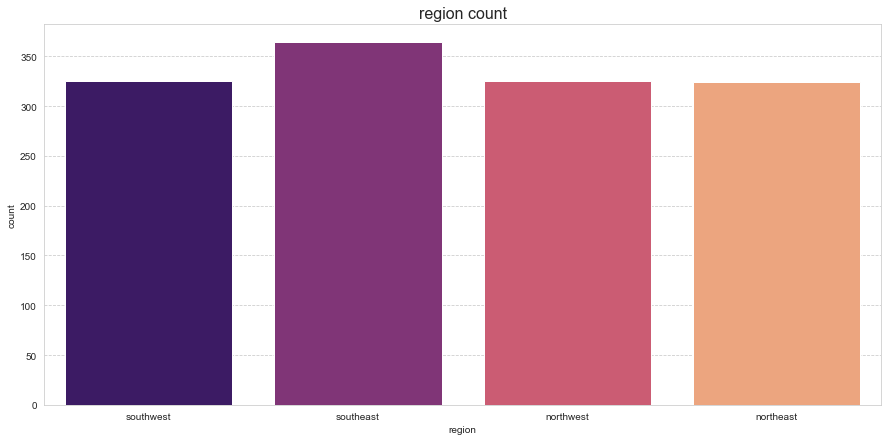

In [17]:
boxplot('region')

In [18]:
# One-hot encoding for nominal features
cat_data = pd.get_dummies(cat_data)
cat_data

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [19]:
# Combine nominal and numeric features
df = pd.concat([num_data, cat_data], axis=1, sort=False)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


#### Normalization

In [20]:
# Rescaling features into a range of [0,1]
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(df)
X = pd.DataFrame(X, columns=df.columns) 
X.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


### Choosing an optimal number of cluster (k)

In [21]:
# Measure the quality of clusterings with different numbers of clusters using the inertia. 
# For each of the given values of k, perform the following steps:
#     Create a KMeans instance called model with k clusters.
#     Fit the model to the data.
#     Append the value of the inertia_ attribute of model to the list inertias.

from sklearn.cluster import KMeans

ks = range(1, 21) # for 1 to 20 clusters
sse = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    km = KMeans(n_clusters = k, random_state = 0)

    # Fit model to samples
    km.fit(X)

    # Append the inertia to the list of inertias
    sse.append(km.inertia_)

C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


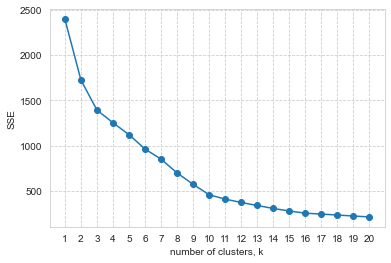

In [22]:
# Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!
import matplotlib.pyplot as plt

# Plot ks vs inertias
plt.plot(ks, sse, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

From the graph that k=10 is a good number of clusters, since it is a point where the SSE begins to decrease more slowly.

#### Choosing best model
Use Silhouette to compare several clustering model and then choose the best one to deploy.

In [23]:
# Experimenting with different classification models with Iris dataset (X)
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score

scores = []
models = []

k = 15

#Applying kmeans to the dataset with the optimal k value
from sklearn.cluster import KMeans
km = KMeans(n_clusters = k)
y_km = km.fit_predict(X)
silhouette = silhouette_score(X, y_km)
scores.append(silhouette)
models.append(km)

# Agglomerative Clustering (single linkage)
from sklearn.cluster import AgglomerativeClustering
ac_s = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
y_ac_s = ac_s.fit_predict(X)
silhouette = silhouette_score(X, y_ac_s)
scores.append(silhouette)
models.append(ac_s)

# Agglomerative Clustering (average linkage)
from sklearn.cluster import AgglomerativeClustering
ac_a = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
y_ac_a = ac_a.fit_predict(X)
silhouette = silhouette_score(X, y_ac_a)
scores.append(silhouette)
models.append(ac_a)

# Agglomerative Clustering (complete linkage)
from sklearn.cluster import AgglomerativeClustering
ac_c = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
y_ac_c = ac_c.fit_predict(X)
silhouette = silhouette_score(X, y_ac_c)
scores.append(silhouette)
models.append(ac_c)

#DBSCAN
from sklearn.cluster import DBSCAN
SC_Clust = DBSCAN(eps=0.5, min_samples=k).fit(X)
y_SC_Clust = SC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SC_Clust)
scores.append(silhouette)
models.append(SC_Clust)

#OPTICS
from sklearn.cluster import OPTICS
OP_Clust = OPTICS(min_samples = k, xi = 0.05, min_cluster_size = 0.05).fit(X)
y_OP_Clust = OP_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_OP_Clust)
scores.append(silhouette)
models.append(OP_Clust)

#Spectral Clustering
from sklearn.cluster import SpectralClustering
SPC_Clust = SpectralClustering(n_clusters=k, assign_labels = 'discretize').fit(X)
y_SPC = SPC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SPC)
scores.append(silhouette)
models.append(SPC_Clust)

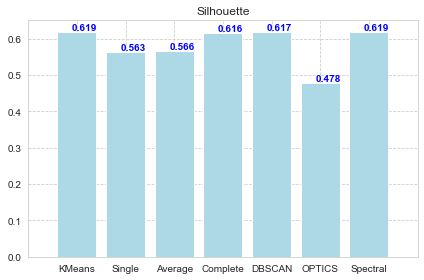

In [24]:
plt.title('Silhouette')
no_of_models = len(scores)
model_labels = ['KMeans', 'Single','Average','Complete', 'DBSCAN', 'OPTICS', 'Spectral']
plt.bar(range(no_of_models), scores, color='lightblue', align='center')
plt.xticks(range(no_of_models), model_labels)#, rotation=45)
plt.xlim([-1, no_of_models])

# set individual bar lables with accuracy value
for i, v in enumerate(scores):
    plt.text(i-0.1, v+0.005, str(round(v,3)), color='Blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

In [25]:
import operator
index, value = max(enumerate(scores), key=operator.itemgetter(1))

optimal_model = models[index]
print(optimal_model)

KMeans(n_clusters=15)


##### Testing with other value of K range in 13-17, to observe accuracy. 

K = 13

In [26]:
# Experimenting with different classification models with Iris dataset (X)
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score

scores = []
models = []

k = 13

#Applying kmeans to the dataset with the optimal k value
from sklearn.cluster import KMeans
km = KMeans(n_clusters = k)
y_km = km.fit_predict(X)
silhouette = silhouette_score(X, y_km)
scores.append(silhouette)
models.append(km)

# Agglomerative Clustering (single linkage)
from sklearn.cluster import AgglomerativeClustering
ac_s = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
y_ac_s = ac_s.fit_predict(X)
silhouette = silhouette_score(X, y_ac_s)
scores.append(silhouette)
models.append(ac_s)

# Agglomerative Clustering (average linkage)
from sklearn.cluster import AgglomerativeClustering
ac_a = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
y_ac_a = ac_a.fit_predict(X)
silhouette = silhouette_score(X, y_ac_a)
scores.append(silhouette)
models.append(ac_a)

# Agglomerative Clustering (complete linkage)
from sklearn.cluster import AgglomerativeClustering
ac_c = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
y_ac_c = ac_c.fit_predict(X)
silhouette = silhouette_score(X, y_ac_c)
scores.append(silhouette)
models.append(ac_c)

#DBSCAN
from sklearn.cluster import DBSCAN
SC_Clust = DBSCAN(eps=0.5, min_samples=k).fit(X)
y_SC_Clust = SC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SC_Clust)
scores.append(silhouette)
models.append(SC_Clust)

#OPTICS
from sklearn.cluster import OPTICS
OP_Clust = OPTICS(min_samples = k, xi = 0.05, min_cluster_size = 0.05).fit(X)
y_OP_Clust = OP_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_OP_Clust)
scores.append(silhouette)
models.append(OP_Clust)

#Spectral Clustering
from sklearn.cluster import SpectralClustering
SPC_Clust = SpectralClustering(n_clusters=k, assign_labels = 'discretize').fit(X)
y_SPC = SPC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SPC)
scores.append(silhouette)
models.append(SPC_Clust)

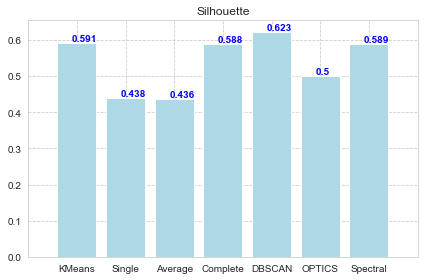

In [27]:
plt.title('Silhouette')
no_of_models = len(scores)
model_labels = ['KMeans', 'Single','Average','Complete', 'DBSCAN', 'OPTICS', 'Spectral']
plt.bar(range(no_of_models), scores, color='lightblue', align='center')
plt.xticks(range(no_of_models), model_labels)#, rotation=45)
plt.xlim([-1, no_of_models])

# set individual bar lables with accuracy value
for i, v in enumerate(scores):
    plt.text(i-0.1, v+0.005, str(round(v,3)), color='Blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

In [28]:
import operator
index, value = max(enumerate(scores), key=operator.itemgetter(1))

optimal_model = models[index]
print(optimal_model)

DBSCAN(min_samples=13)


K = 14

In [29]:
# Experimenting with different classification models with Iris dataset (X)
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score

scores = []
models = []

k = 14

#Applying kmeans to the dataset with the optimal k value
from sklearn.cluster import KMeans
km = KMeans(n_clusters = k)
y_km = km.fit_predict(X)
silhouette = silhouette_score(X, y_km)
scores.append(silhouette)
models.append(km)

# Agglomerative Clustering (single linkage)
from sklearn.cluster import AgglomerativeClustering
ac_s = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
y_ac_s = ac_s.fit_predict(X)
silhouette = silhouette_score(X, y_ac_s)
scores.append(silhouette)
models.append(ac_s)

# Agglomerative Clustering (average linkage)
from sklearn.cluster import AgglomerativeClustering
ac_a = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
y_ac_a = ac_a.fit_predict(X)
silhouette = silhouette_score(X, y_ac_a)
scores.append(silhouette)
models.append(ac_a)

# Agglomerative Clustering (complete linkage)
from sklearn.cluster import AgglomerativeClustering
ac_c = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
y_ac_c = ac_c.fit_predict(X)
silhouette = silhouette_score(X, y_ac_c)
scores.append(silhouette)
models.append(ac_c)

#DBSCAN
from sklearn.cluster import DBSCAN
SC_Clust = DBSCAN(eps=0.5, min_samples=k).fit(X)
y_SC_Clust = SC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SC_Clust)
scores.append(silhouette)
models.append(SC_Clust)

#OPTICS
from sklearn.cluster import OPTICS
OP_Clust = OPTICS(min_samples = k, xi = 0.05, min_cluster_size = 0.05).fit(X)
y_OP_Clust = OP_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_OP_Clust)
scores.append(silhouette)
models.append(OP_Clust)

#Spectral Clustering
from sklearn.cluster import SpectralClustering
SPC_Clust = SpectralClustering(n_clusters=k, assign_labels = 'discretize').fit(X)
y_SPC = SPC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SPC)
scores.append(silhouette)
models.append(SPC_Clust)

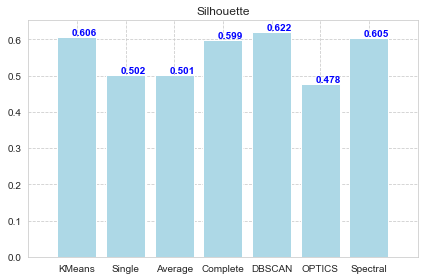

In [30]:
plt.title('Silhouette')
no_of_models = len(scores)
model_labels = ['KMeans', 'Single','Average','Complete', 'DBSCAN', 'OPTICS', 'Spectral']
plt.bar(range(no_of_models), scores, color='lightblue', align='center')
plt.xticks(range(no_of_models), model_labels)#, rotation=45)
plt.xlim([-1, no_of_models])

# set individual bar lables with accuracy value
for i, v in enumerate(scores):
    plt.text(i-0.1, v+0.005, str(round(v,3)), color='Blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

In [31]:
import operator
index, value = max(enumerate(scores), key=operator.itemgetter(1))

optimal_model = models[index]
print(optimal_model)

DBSCAN(min_samples=14)


K = 16

In [32]:
# Experimenting with different classification models with Iris dataset (X)
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score

scores = []
models = []

k = 16

#Applying kmeans to the dataset with the optimal k value
from sklearn.cluster import KMeans
km = KMeans(n_clusters = k)
y_km = km.fit_predict(X)
silhouette = silhouette_score(X, y_km)
scores.append(silhouette)
models.append(km)

# Agglomerative Clustering (single linkage)
from sklearn.cluster import AgglomerativeClustering
ac_s = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
y_ac_s = ac_s.fit_predict(X)
silhouette = silhouette_score(X, y_ac_s)
scores.append(silhouette)
models.append(ac_s)

# Agglomerative Clustering (average linkage)
from sklearn.cluster import AgglomerativeClustering
ac_a = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
y_ac_a = ac_a.fit_predict(X)
silhouette = silhouette_score(X, y_ac_a)
scores.append(silhouette)
models.append(ac_a)

# Agglomerative Clustering (complete linkage)
from sklearn.cluster import AgglomerativeClustering
ac_c = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
y_ac_c = ac_c.fit_predict(X)
silhouette = silhouette_score(X, y_ac_c)
scores.append(silhouette)
models.append(ac_c)

#DBSCAN
from sklearn.cluster import DBSCAN
SC_Clust = DBSCAN(eps=0.5, min_samples=k).fit(X)
y_SC_Clust = SC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SC_Clust)
scores.append(silhouette)
models.append(SC_Clust)

#OPTICS
from sklearn.cluster import OPTICS
OP_Clust = OPTICS(min_samples = k, xi = 0.05, min_cluster_size = 0.05).fit(X)
y_OP_Clust = OP_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_OP_Clust)
scores.append(silhouette)
models.append(OP_Clust)

#Spectral Clustering
from sklearn.cluster import SpectralClustering
SPC_Clust = SpectralClustering(n_clusters=k, assign_labels = 'discretize').fit(X)
y_SPC = SPC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SPC)
scores.append(silhouette)
models.append(SPC_Clust)

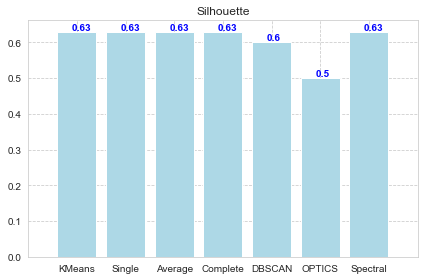

In [33]:
plt.title('Silhouette')
no_of_models = len(scores)
model_labels = ['KMeans', 'Single','Average','Complete', 'DBSCAN', 'OPTICS', 'Spectral']
plt.bar(range(no_of_models), scores, color='lightblue', align='center')
plt.xticks(range(no_of_models), model_labels)#, rotation=45)
plt.xlim([-1, no_of_models])

# set individual bar lables with accuracy value
for i, v in enumerate(scores):
    plt.text(i-0.1, v+0.005, str(round(v,3)), color='Blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

In [34]:
import operator
index, value = max(enumerate(scores), key=operator.itemgetter(1))

optimal_model = models[index]
print(optimal_model)

KMeans(n_clusters=16)


K = 17

In [35]:
# Experimenting with different classification models with Iris dataset (X)
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score

scores = []
models = []

k = 17

#Applying kmeans to the dataset with the optimal k value
from sklearn.cluster import KMeans
km = KMeans(n_clusters = k)
y_km = km.fit_predict(X)
silhouette = silhouette_score(X, y_km)
scores.append(silhouette)
models.append(km)

# Agglomerative Clustering (single linkage)
from sklearn.cluster import AgglomerativeClustering
ac_s = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
y_ac_s = ac_s.fit_predict(X)
silhouette = silhouette_score(X, y_ac_s)
scores.append(silhouette)
models.append(ac_s)

# Agglomerative Clustering (average linkage)
from sklearn.cluster import AgglomerativeClustering
ac_a = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
y_ac_a = ac_a.fit_predict(X)
silhouette = silhouette_score(X, y_ac_a)
scores.append(silhouette)
models.append(ac_a)

# Agglomerative Clustering (complete linkage)
from sklearn.cluster import AgglomerativeClustering
ac_c = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
y_ac_c = ac_c.fit_predict(X)
silhouette = silhouette_score(X, y_ac_c)
scores.append(silhouette)
models.append(ac_c)

#DBSCAN
from sklearn.cluster import DBSCAN
SC_Clust = DBSCAN(eps=0.5, min_samples=k).fit(X)
y_SC_Clust = SC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SC_Clust)
scores.append(silhouette)
models.append(SC_Clust)

#OPTICS
from sklearn.cluster import OPTICS
OP_Clust = OPTICS(min_samples = k, xi = 0.05, min_cluster_size = 0.05).fit(X)
y_OP_Clust = OP_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_OP_Clust)
scores.append(silhouette)
models.append(OP_Clust)

#Spectral Clustering
from sklearn.cluster import SpectralClustering
SPC_Clust = SpectralClustering(n_clusters=k, assign_labels = 'discretize').fit(X)
y_SPC = SPC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SPC)
scores.append(silhouette)
models.append(SPC_Clust)

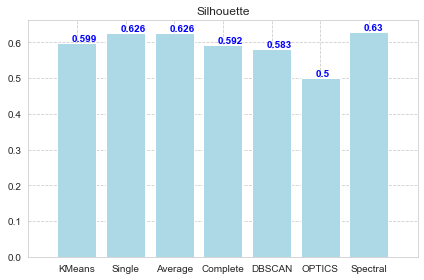

In [36]:
plt.title('Silhouette')
no_of_models = len(scores)
model_labels = ['KMeans', 'Single','Average','Complete', 'DBSCAN', 'OPTICS', 'Spectral']
plt.bar(range(no_of_models), scores, color='lightblue', align='center')
plt.xticks(range(no_of_models), model_labels)#, rotation=45)
plt.xlim([-1, no_of_models])

# set individual bar lables with accuracy value
for i, v in enumerate(scores):
    plt.text(i-0.1, v+0.005, str(round(v,3)), color='Blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

In [37]:
import operator
index, value = max(enumerate(scores), key=operator.itemgetter(1))

optimal_model = models[index]
print(optimal_model)

SpectralClustering(assign_labels='discretize', n_clusters=17)


K = 10

In [38]:
# Experimenting with different classification models with Iris dataset (X)
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score

scores = []
models = []

k = 10

#Applying kmeans to the dataset with the optimal k value
from sklearn.cluster import KMeans
km = KMeans(n_clusters = k)
y_km = km.fit_predict(X)
silhouette = silhouette_score(X, y_km)
scores.append(silhouette)
models.append(km)

# Agglomerative Clustering (single linkage)
from sklearn.cluster import AgglomerativeClustering
ac_s = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
y_ac_s = ac_s.fit_predict(X)
silhouette = silhouette_score(X, y_ac_s)
scores.append(silhouette)
models.append(ac_s)

# Agglomerative Clustering (average linkage)
from sklearn.cluster import AgglomerativeClustering
ac_a = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
y_ac_a = ac_a.fit_predict(X)
silhouette = silhouette_score(X, y_ac_a)
scores.append(silhouette)
models.append(ac_a)

# Agglomerative Clustering (complete linkage)
from sklearn.cluster import AgglomerativeClustering
ac_c = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
y_ac_c = ac_c.fit_predict(X)
silhouette = silhouette_score(X, y_ac_c)
scores.append(silhouette)
models.append(ac_c)

#DBSCAN
from sklearn.cluster import DBSCAN
SC_Clust = DBSCAN(eps=0.5, min_samples=k).fit(X)
y_SC_Clust = SC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SC_Clust)
scores.append(silhouette)
models.append(SC_Clust)

#OPTICS
from sklearn.cluster import OPTICS
OP_Clust = OPTICS(min_samples = k, xi = 0.05, min_cluster_size = 0.05).fit(X)
y_OP_Clust = OP_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_OP_Clust)
scores.append(silhouette)
models.append(OP_Clust)

#Spectral Clustering
from sklearn.cluster import SpectralClustering
SPC_Clust = SpectralClustering(n_clusters=k, assign_labels = 'discretize').fit(X)
y_SPC = SPC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SPC)
scores.append(silhouette)
models.append(SPC_Clust)

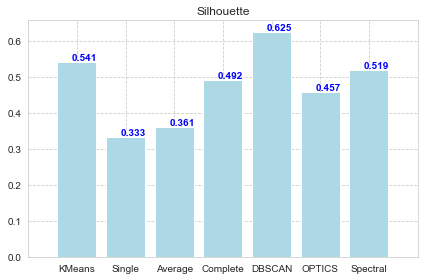

In [39]:
plt.title('Silhouette')
no_of_models = len(scores)
model_labels = ['KMeans', 'Single','Average','Complete', 'DBSCAN', 'OPTICS', 'Spectral']
plt.bar(range(no_of_models), scores, color='lightblue', align='center')
plt.xticks(range(no_of_models), model_labels)#, rotation=45)
plt.xlim([-1, no_of_models])

# set individual bar lables with accuracy value
for i, v in enumerate(scores):
    plt.text(i-0.1, v+0.005, str(round(v,3)), color='Blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

K = 8

In [40]:
# Experimenting with different classification models with Iris dataset (X)
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score

scores = []
models = []

k = 8

#Applying kmeans to the dataset with the optimal k value
from sklearn.cluster import KMeans
km = KMeans(n_clusters = k)
y_km = km.fit_predict(X)
silhouette = silhouette_score(X, y_km)
scores.append(silhouette)
models.append(km)

# Agglomerative Clustering (single linkage)
from sklearn.cluster import AgglomerativeClustering
ac_s = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
y_ac_s = ac_s.fit_predict(X)
silhouette = silhouette_score(X, y_ac_s)
scores.append(silhouette)
models.append(ac_s)

# Agglomerative Clustering (average linkage)
from sklearn.cluster import AgglomerativeClustering
ac_a = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
y_ac_a = ac_a.fit_predict(X)
silhouette = silhouette_score(X, y_ac_a)
scores.append(silhouette)
models.append(ac_a)

# Agglomerative Clustering (complete linkage)
from sklearn.cluster import AgglomerativeClustering
ac_c = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
y_ac_c = ac_c.fit_predict(X)
silhouette = silhouette_score(X, y_ac_c)
scores.append(silhouette)
models.append(ac_c)

#DBSCAN
from sklearn.cluster import DBSCAN
SC_Clust = DBSCAN(eps=0.5, min_samples=k).fit(X)
y_SC_Clust = SC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SC_Clust)
scores.append(silhouette)
models.append(SC_Clust)

#OPTICS
from sklearn.cluster import OPTICS
OP_Clust = OPTICS(min_samples = k, xi = 0.05, min_cluster_size = 0.05).fit(X)
y_OP_Clust = OP_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_OP_Clust)
scores.append(silhouette)
models.append(OP_Clust)

#Spectral Clustering
from sklearn.cluster import SpectralClustering
SPC_Clust = SpectralClustering(n_clusters=k, assign_labels = 'discretize').fit(X)
y_SPC = SPC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SPC)
scores.append(silhouette)
models.append(SPC_Clust)

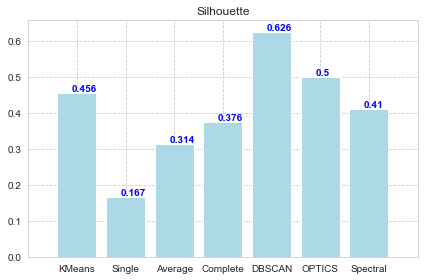

In [41]:
plt.title('Silhouette')
no_of_models = len(scores)
model_labels = ['KMeans', 'Single','Average','Complete', 'DBSCAN', 'OPTICS', 'Spectral']
plt.bar(range(no_of_models), scores, color='lightblue', align='center')
plt.xticks(range(no_of_models), model_labels)#, rotation=45)
plt.xlim([-1, no_of_models])

# set individual bar lables with accuracy value
for i, v in enumerate(scores):
    plt.text(i-0.1, v+0.005, str(round(v,3)), color='Blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

K = 9

In [42]:
# Experimenting with different classification models with Iris dataset (X)
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score

scores = []
models = []

k = 9

#Applying kmeans to the dataset with the optimal k value
from sklearn.cluster import KMeans
km = KMeans(n_clusters = k)
y_km = km.fit_predict(X)
silhouette = silhouette_score(X, y_km)
scores.append(silhouette)
models.append(km)

# Agglomerative Clustering (single linkage)
from sklearn.cluster import AgglomerativeClustering
ac_s = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
y_ac_s = ac_s.fit_predict(X)
silhouette = silhouette_score(X, y_ac_s)
scores.append(silhouette)
models.append(ac_s)

# Agglomerative Clustering (average linkage)
from sklearn.cluster import AgglomerativeClustering
ac_a = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
y_ac_a = ac_a.fit_predict(X)
silhouette = silhouette_score(X, y_ac_a)
scores.append(silhouette)
models.append(ac_a)

# Agglomerative Clustering (complete linkage)
from sklearn.cluster import AgglomerativeClustering
ac_c = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
y_ac_c = ac_c.fit_predict(X)
silhouette = silhouette_score(X, y_ac_c)
scores.append(silhouette)
models.append(ac_c)

#DBSCAN
from sklearn.cluster import DBSCAN
SC_Clust = DBSCAN(eps=0.5, min_samples=k).fit(X)
y_SC_Clust = SC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SC_Clust)
scores.append(silhouette)
models.append(SC_Clust)

#OPTICS
from sklearn.cluster import OPTICS
OP_Clust = OPTICS(min_samples = k, xi = 0.05, min_cluster_size = 0.05).fit(X)
y_OP_Clust = OP_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_OP_Clust)
scores.append(silhouette)
models.append(OP_Clust)

#Spectral Clustering
from sklearn.cluster import SpectralClustering
SPC_Clust = SpectralClustering(n_clusters=k, assign_labels = 'discretize').fit(X)
y_SPC = SPC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SPC)
scores.append(silhouette)
models.append(SPC_Clust)

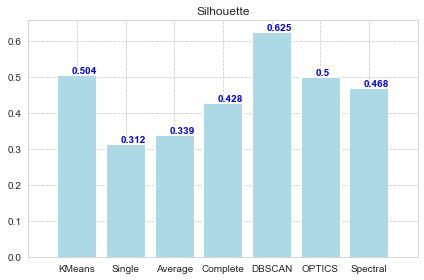

In [43]:
plt.title('Silhouette')
no_of_models = len(scores)
model_labels = ['KMeans', 'Single','Average','Complete', 'DBSCAN', 'OPTICS', 'Spectral']
plt.bar(range(no_of_models), scores, color='lightblue', align='center')
plt.xticks(range(no_of_models), model_labels)#, rotation=45)
plt.xlim([-1, no_of_models])

# set individual bar lables with accuracy value
for i, v in enumerate(scores):
    plt.text(i-0.1, v+0.005, str(round(v,3)), color='Blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

K = 11

In [44]:
# Experimenting with different classification models with Iris dataset (X)
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score

scores = []
models = []

k = 11

#Applying kmeans to the dataset with the optimal k value
from sklearn.cluster import KMeans
km = KMeans(n_clusters = k)
y_km = km.fit_predict(X)
silhouette = silhouette_score(X, y_km)
scores.append(silhouette)
models.append(km)

# Agglomerative Clustering (single linkage)
from sklearn.cluster import AgglomerativeClustering
ac_s = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
y_ac_s = ac_s.fit_predict(X)
silhouette = silhouette_score(X, y_ac_s)
scores.append(silhouette)
models.append(ac_s)

# Agglomerative Clustering (average linkage)
from sklearn.cluster import AgglomerativeClustering
ac_a = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
y_ac_a = ac_a.fit_predict(X)
silhouette = silhouette_score(X, y_ac_a)
scores.append(silhouette)
models.append(ac_a)

# Agglomerative Clustering (complete linkage)
from sklearn.cluster import AgglomerativeClustering
ac_c = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
y_ac_c = ac_c.fit_predict(X)
silhouette = silhouette_score(X, y_ac_c)
scores.append(silhouette)
models.append(ac_c)

#DBSCAN
from sklearn.cluster import DBSCAN
SC_Clust = DBSCAN(eps=0.5, min_samples=k).fit(X)
y_SC_Clust = SC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SC_Clust)
scores.append(silhouette)
models.append(SC_Clust)

#OPTICS
from sklearn.cluster import OPTICS
OP_Clust = OPTICS(min_samples = k, xi = 0.05, min_cluster_size = 0.05).fit(X)
y_OP_Clust = OP_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_OP_Clust)
scores.append(silhouette)
models.append(OP_Clust)

#Spectral Clustering
from sklearn.cluster import SpectralClustering
SPC_Clust = SpectralClustering(n_clusters=k, assign_labels = 'discretize').fit(X)
y_SPC = SPC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SPC)
scores.append(silhouette)
models.append(SPC_Clust)

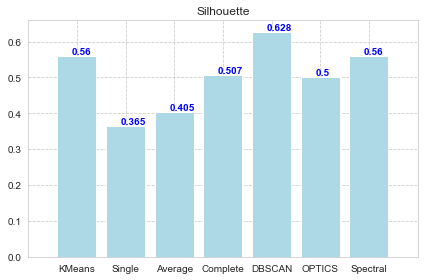

In [45]:
plt.title('Silhouette')
no_of_models = len(scores)
model_labels = ['KMeans', 'Single','Average','Complete', 'DBSCAN', 'OPTICS', 'Spectral']
plt.bar(range(no_of_models), scores, color='lightblue', align='center')
plt.xticks(range(no_of_models), model_labels)#, rotation=45)
plt.xlim([-1, no_of_models])

# set individual bar lables with accuracy value
for i, v in enumerate(scores):
    plt.text(i-0.1, v+0.005, str(round(v,3)), color='Blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

K = 12

In [46]:
# Experimenting with different classification models with Iris dataset (X)
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score

scores = []
models = []

k = 12

#Applying kmeans to the dataset with the optimal k value
from sklearn.cluster import KMeans
km = KMeans(n_clusters = k)
y_km = km.fit_predict(X)
silhouette = silhouette_score(X, y_km)
scores.append(silhouette)
models.append(km)

# Agglomerative Clustering (single linkage)
from sklearn.cluster import AgglomerativeClustering
ac_s = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
y_ac_s = ac_s.fit_predict(X)
silhouette = silhouette_score(X, y_ac_s)
scores.append(silhouette)
models.append(ac_s)

# Agglomerative Clustering (average linkage)
from sklearn.cluster import AgglomerativeClustering
ac_a = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
y_ac_a = ac_a.fit_predict(X)
silhouette = silhouette_score(X, y_ac_a)
scores.append(silhouette)
models.append(ac_a)

# Agglomerative Clustering (complete linkage)
from sklearn.cluster import AgglomerativeClustering
ac_c = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
y_ac_c = ac_c.fit_predict(X)
silhouette = silhouette_score(X, y_ac_c)
scores.append(silhouette)
models.append(ac_c)

#DBSCAN
from sklearn.cluster import DBSCAN
SC_Clust = DBSCAN(eps=0.5, min_samples=k).fit(X)
y_SC_Clust = SC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SC_Clust)
scores.append(silhouette)
models.append(SC_Clust)

#OPTICS
from sklearn.cluster import OPTICS
OP_Clust = OPTICS(min_samples = k, xi = 0.05, min_cluster_size = 0.05).fit(X)
y_OP_Clust = OP_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_OP_Clust)
scores.append(silhouette)
models.append(OP_Clust)

#Spectral Clustering
from sklearn.cluster import SpectralClustering
SPC_Clust = SpectralClustering(n_clusters=k, assign_labels = 'discretize').fit(X)
y_SPC = SPC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SPC)
scores.append(silhouette)
models.append(SPC_Clust)

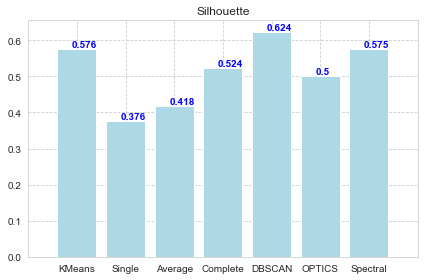

In [47]:
plt.title('Silhouette')
no_of_models = len(scores)
model_labels = ['KMeans', 'Single','Average','Complete', 'DBSCAN', 'OPTICS', 'Spectral']
plt.bar(range(no_of_models), scores, color='lightblue', align='center')
plt.xticks(range(no_of_models), model_labels)#, rotation=45)
plt.xlim([-1, no_of_models])

# set individual bar lables with accuracy value
for i, v in enumerate(scores):
    plt.text(i-0.1, v+0.005, str(round(v,3)), color='Blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

## Combination with DBSCAN Clustering and Decision Tree Regression

### From above result, DBSCAN is the best algorithm to clustering model with dataset that we used. In regression, best model is Decision Tree Regression

### DBSCAN Clustering

Create model to clustering with dataset

In [48]:
from sklearn.cluster import DBSCAN
db_scan = DBSCAN(eps=1, min_samples=10)
y_db_sc = db_scan.fit_predict(X)
col_names = list(df.columns.values)

# append cluster labels to the last column of the dataset
result = pd.concat([pd.DataFrame(df,columns=col_names), pd.DataFrame(y_db_sc,columns=['Cluster_Labels']) ], axis=1)

#cluster label starts from 0
result.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,Cluster_Labels
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,0
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,1
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,1
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,2
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,2


#### What is SSE of the optimal model?

In [49]:
silhouette = silhouette_score(X, y_db_sc)
print("Silhouette Score: ", silhouette)

Silhouette Score:  0.6301055067547155


#### How many members for each clusters?

In [50]:
# Number of members in each cluster
result.Cluster_Labels.value_counts()

11    141
3     139
4     135
1     134
2     132
9     132
7     126
5     125
8      55
13     38
10     37
6      36
12     29
14     29
15     29
0      21
Name: Cluster_Labels, dtype: int64

Plot graph to see relation with cluster

Text(0.5, 1.0, 'Distribution of charges by age and Cluster Labels')

<Figure size 1080x504 with 0 Axes>

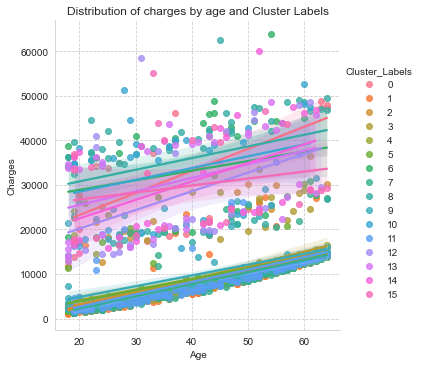

In [51]:
#The relationship between insurance claim amounts and age.
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (15, 7))
sns.lmplot(x = "age", y = "charges", hue="Cluster_Labels", data = result)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of charges by age and Cluster Labels")

Text(0.5, 1.0, 'Distribution of charges by BMI and Cluster Labels')

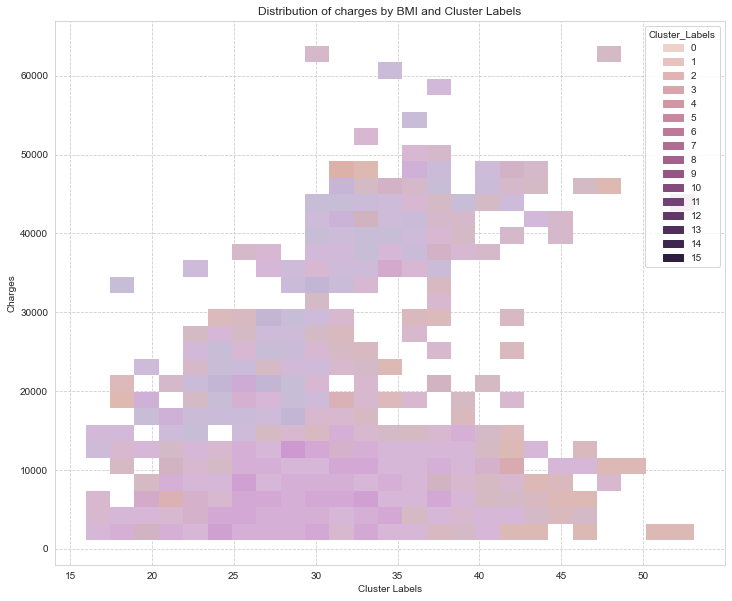

In [52]:
#The relationship between BMI and insurance claims.
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (12, 10))
sns.histplot(x = "bmi", y = "charges", hue="Cluster_Labels", data = result)
plt.xlabel("Cluster Labels")
plt.ylabel("Charges")
plt.title("Distribution of charges by BMI and Cluster Labels")

### Split data to X and Y for Regression

In [53]:
X = result[['age', 'bmi', 'children','sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast','region_southwest']]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [54]:
Y = result[['charges']]
Y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [56]:
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (1070, 11)
x_test:  (268, 11)
y_train:  (1070, 1)
y_test:  (268, 1)


### Decision Tree Regression

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()

linearRegression.fit(x_train, y_train)

linearRPredictions = linearRegression.predict(x_test)

mse = mean_squared_error(y_test, linearRPredictions)
mse

31827950.229523852

In [58]:
#Import library to Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Fit regression model
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X,Y)

# Predict
y_reg_train = reg.predict(x_train)
y_reg_test = reg.predict(x_test)

#MSE
regressor_decision_tree = LinearRegression()
regressor_decision_tree.fit(x_train, y_train)

predict_decison = regressor_decision_tree.predict(x_test)

mseDecison = mean_squared_error(y_test, predict_decison)
r2scoreDecison = regressor_decision_tree.score(x_test, y_test)

print('MSE = ', mseDecison)
print('R2 Score = ', r2scoreDecison)


MSE =  31827950.229523852
R2 Score =  0.7999876970680433


In [60]:
X_new = pd.read_csv('insurance_sample.csv')
X_new

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [61]:
X_new.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [62]:
num_data = X_new.select_dtypes(include='number')
num_data.head()

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523
2,28,33.00,3,4449.4620


In [63]:
cat_data = X_new.select_dtypes('object')
cat_data.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast


In [64]:
# One-hot encoding for nominal features
cat_data = pd.get_dummies(cat_data)
cat_data

,sex_female,sex_male,smoker_no,smoker_yes,region_southeast,region_southwest
0,1,0,0,1,0,1
1,0,1,1,0,1,0
2,0,1,1,0,1,0


In [65]:
# Combine nominal and numeric features
X_new = pd.concat([num_data, cat_data], axis=1, sort=False)
X_new.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_southeast,region_southwest
0,19,27.90,0,16884.9240,1,0,0,1,0,1
1,18,33.77,1,1725.5523,0,1,1,0,1,0
2,28,33.00,3,4449.4620,0,1,1,0,1,0


In [66]:
X_new = mms.fit_transform(X_new) # (2) normalize them using the normalization model created previously (sc is StandardScaler)
X_new

array([[0.1       , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ],
       [0.        , 1.        , 0.33333333, 0.        , 0.        ,
        1.        , 1.        , 0.        , 1.        , 0.        ],
       [1.        , 0.86882453, 1.        , 0.17968487, 0.        ,
        1.        , 1.        , 0.        , 1.        , 0.        ]])

In [67]:
y_new_pred = reg.predict(X_new) # (3) predict class value
y_new_pred

C:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 10 features, but DecisionTreeRegressor is expecting 11 features as input.

In [ ]:
#The relationship between BMI and insurance claims.
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (12, 10))
sns.scatterplot(x = "bmi", y = "charges", data = result)
plt.plot(x_test, y_reg_test)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Distribution of charges by bmi")

InvalidIndexError: (slice(None, None, None), None)

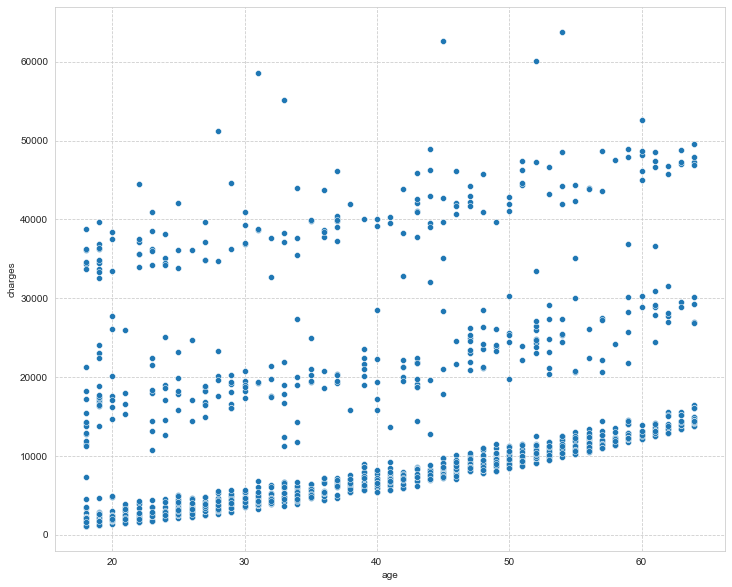

In [68]:
#The relationship between BMI and insurance claims.
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (12, 10))
sns.scatterplot(x = "age", y = "charges", data = result)
plt.plot(x_test, y_reg_test)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of charges by Age")

In [69]:
import pickle
pickle.dump(reg,open('Cluster_Regression.pkl', 'wb'))
pickle.dump(mms, open('normalization.pkl', 'wb'))